<a href="https://colab.research.google.com/github/dcontrerascaballol/inventos/blob/main/Trabajo_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

## Problema a estudiar

Detección temprana del cáncer de cuello uterino basada en determinantes del comportamiento con algoritmo de aprendizaje automático

El marco de los datos se encuentra en el desarrollo del estudio anterior. La variable central dependiente es tener cáncer de cuello uterino o no, en base a otras variables medidas. El cáncer de cuello uterino (Ca Cervix) es un grave problema de salud pública en las mujeres en el mundo. Afortunadamente, esta enfermedad se puede prevenir. El método de prevención actual sigue siendo bajo tanto en el resultado como en la participación. Por lo tanto, el método de prevención o detección temprana sigue abierto y desafiante. El comportamiento y su determinante son prometedores como predictor de Ca Cervix y el evento como detección temprana. Hasta la fecha, todavía hay una cantidad limitada de investigación realizada en la detección de Ca Cervix basada en el comportamiento y el aprendizaje automático en la combinación del campo de la salud pública y la informática.

El cancer de cervix es un tumor maligno en la parte inferior del útero (matriz) que se puede diagnosticar mediante la prueba de Papanicolaou y se puede prevenir mediante la vacuna contra el VPH. Es posible que no se presenten síntomas. En algunos casos, puede haber dolor o sangrado irregular.

## Variables presentes

Las variables con las que se estudiara la presencia o no del cáncer para poder predecirlo serán:

1) comportamiento al comer <br>
2) comportamiento de higiene personal <br>
3) agregación de intenciones <br>
4) compromiso de intención <br>
5) consistencia de actitud <br>
6) actitud espontaneidad <br>
7) persona significativa de la norma <br>
8) cumplimiento de la norma <br>
9) percepción vulnerabilidad <br>
10) percepción de severidad <br>
11) motivación fuerza <br>
12) motivación voluntad <br>
13) apoyo social emocionalidad <br>
14) apreciación del apoyo social <br>
15) apoyo social instrumental <br>
16) conocimiento de empoderamiento <br>
17) habilidades de empoderamiento <br>
18) deseos de empoderamiento

Por problemas de no poder acceder al trabajo original no se cuestionará en gran medida que significa cada variable, ya que solo poseemos los nombres en inglés de ella, pero esperamos poder tener una aproximación al modelo final de predicción.

## Tipo de MachineLearning

Debido a la naturaleza del problema, tenemos que se debe resolver mediante Aprendizaje Supervisado, ya que debemos desarrollar un modelo predictivo basados tanto en datos de entrada como en los de salida. En esta categoría, el problema corresponde a un problema de clasificación, ya que considera casos donde la variable a pedecir corresponde a grupos o categorías, en este caso, la presencia de cáncer o no. La técnica a emplear será la evaluación de tres modelos (LR, SVM Y KNN) en tres condiciones de estandarización de datos.

## Regresión Logística

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan, como una función de variables explicativas, utilizando una función logística.


# Paquetes necesarios y lectura de archivo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('sobar-72.csv', sep=",")

In [ ]:
df1

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


# Análisis estadístico exploratorio de datos


Tipo de datos : Todas las columnas poseen valores enteros



In [ ]:
df1.dtypes

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object

Estadística Descriptiva

In [ ]:
df1.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


Boxplots diferenciados por presencia de cáncer cervical o no

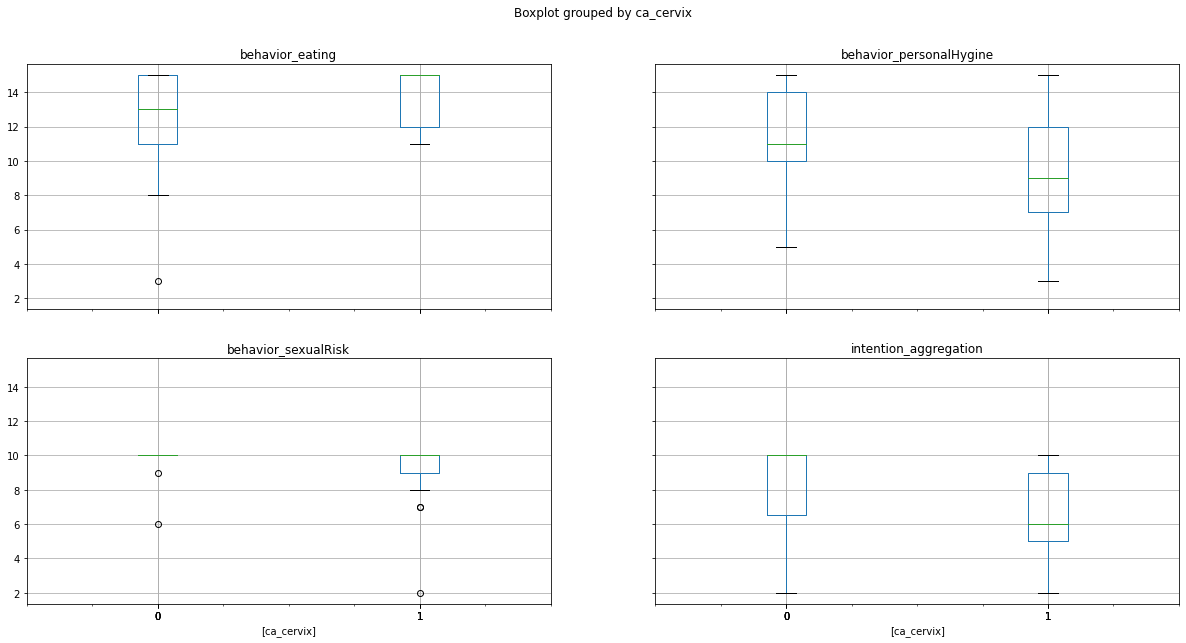

In [ ]:
boxplot = df1.iloc[:,[0,1,2,3,19]].boxplot(by='ca_cervix', figsize = (20,10))

Dentro de estas 4 variables es posible notar que existe diferencia en la variable ante la presencia o no de cáncer cervical para:

- Behavior_eating: comportamiento más elevado ante el cancer
- Behavior_personalhygine: comportamiento más bajo ante el cancer
- Intention_agreggation: comportamiento más bajo ante el cancer

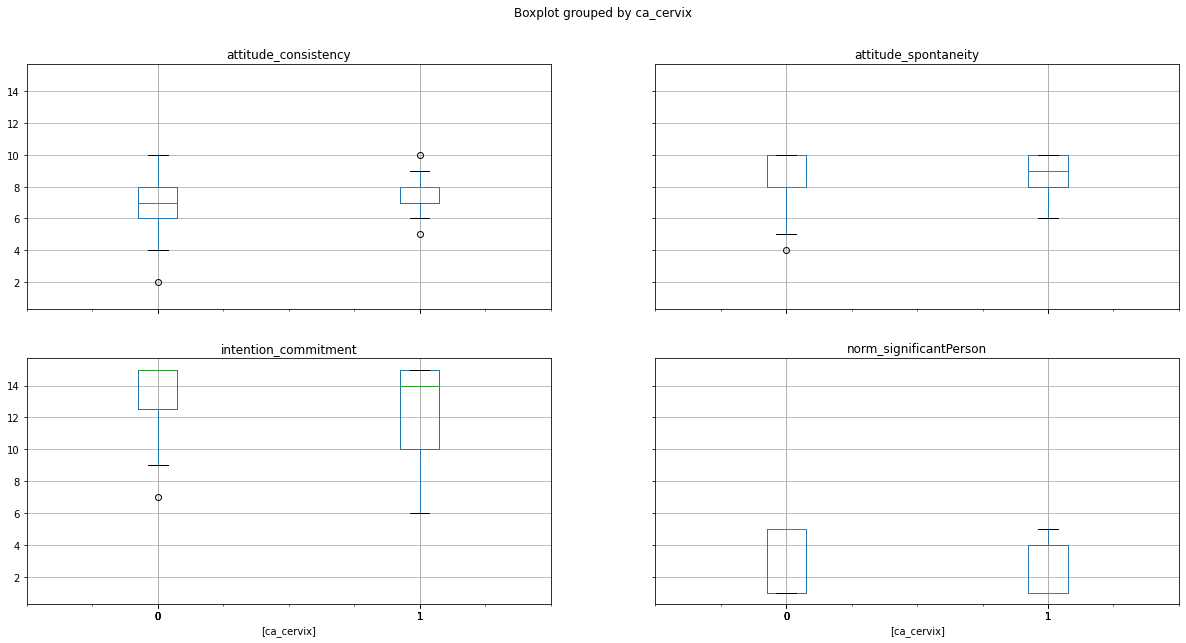

In [ ]:
boxplot = df1.iloc[:,[4,5,6,7,19]].boxplot(by='ca_cervix', figsize = (20,10))

Dentro de estas 4 variables es posible notar que existe diferencia en la variable ante la presencia o no de cáncer cervical para:

- Intention_commitment: comportamiento más bajo ante el cancer
- Attitude_spontaneity: comportamiento más elevado ante el cancer
- Norm_significantPerson: comportamiento más bajo ante el cancer

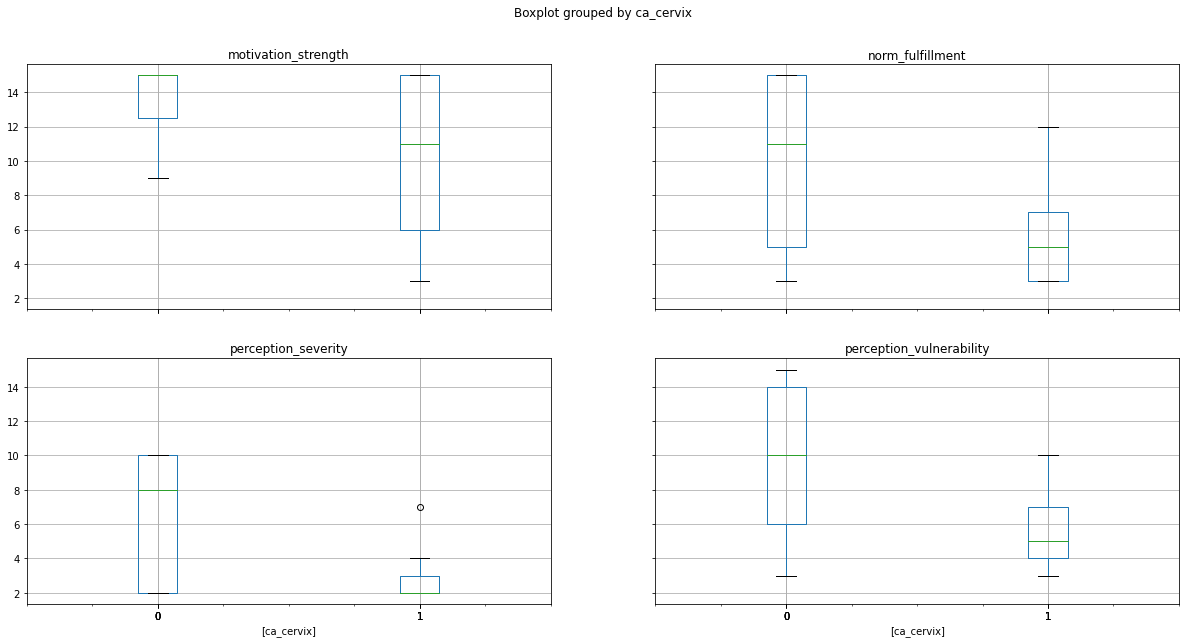

In [ ]:
boxplot = df1.iloc[:,[8,9,10,11,19]].boxplot(by='ca_cervix', figsize = (20,10))

Dentro de estas 4 variables es posible notar que existe diferencia en la variable ante la presencia o no de cáncer cervical para:

- Motivation_strength: comportamiento más bajo ante el cancer
- norm_fulfillment: comportamiento más bajo ante el cancer
- perception_severity: comportamiento más bajo ante el cancer
- perception_vulnerability: comportamiento más bajo ante el cancer

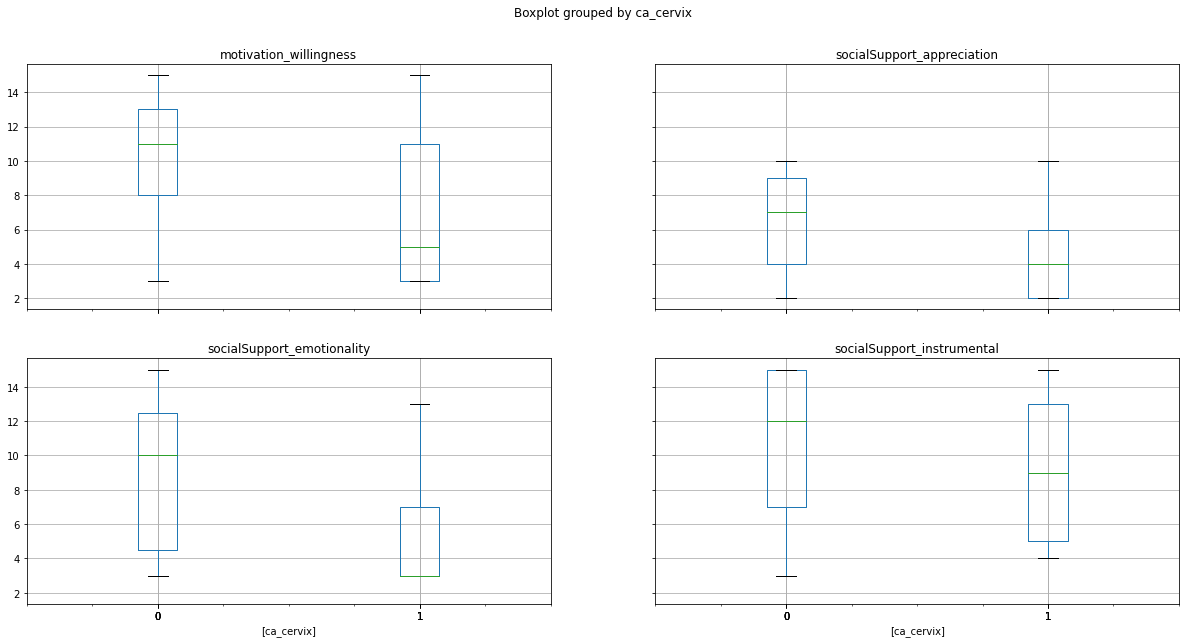

In [ ]:
boxplot = df1.iloc[:,[12,13,14,15,19]].boxplot(by='ca_cervix', figsize = (20,10))

Dentro de estas 4 variables es posible notar que existe diferencia en la variable ante la presencia o no de cáncer cervical para:

- Motivation_willingness: comportamiento más bajo ante el cancer
- socialsupport_appreciation: comportamiento más bajo ante el cancer
- socialsupport_emotionality: comportamiento más bajo ante el cancer


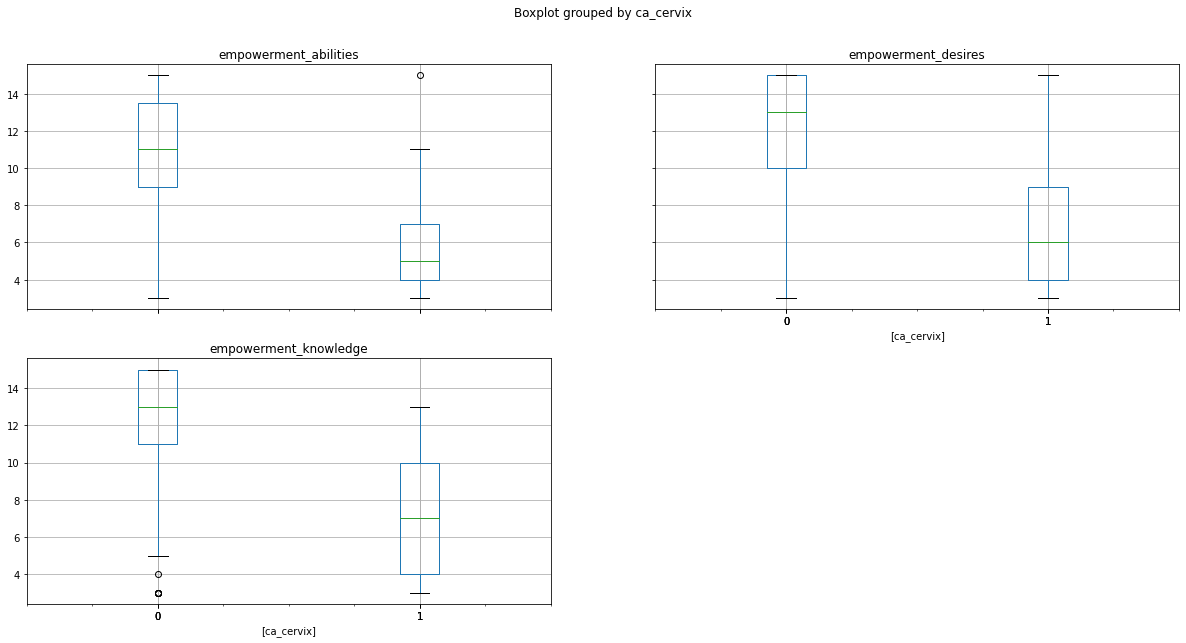

In [ ]:
boxplot = df1.iloc[:,[16,17,18,19]].boxplot(by='ca_cervix', figsize = (20,10))

Dentro de estas 3 variables es posible notar que existe diferencia en la variable ante la presencia o no de cáncer cervical para:

- Empowerment_abilities: comportamiento más bajo ante el cancer
- Empowerment_desires: comportamiento más bajo ante el cancer
- Empowerment_knowledge: comportamiento más bajo ante el cancer

# Metodo de clasificación: Regresión Logística, KNN Y SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<h2>Visualización del dataset</h2>


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


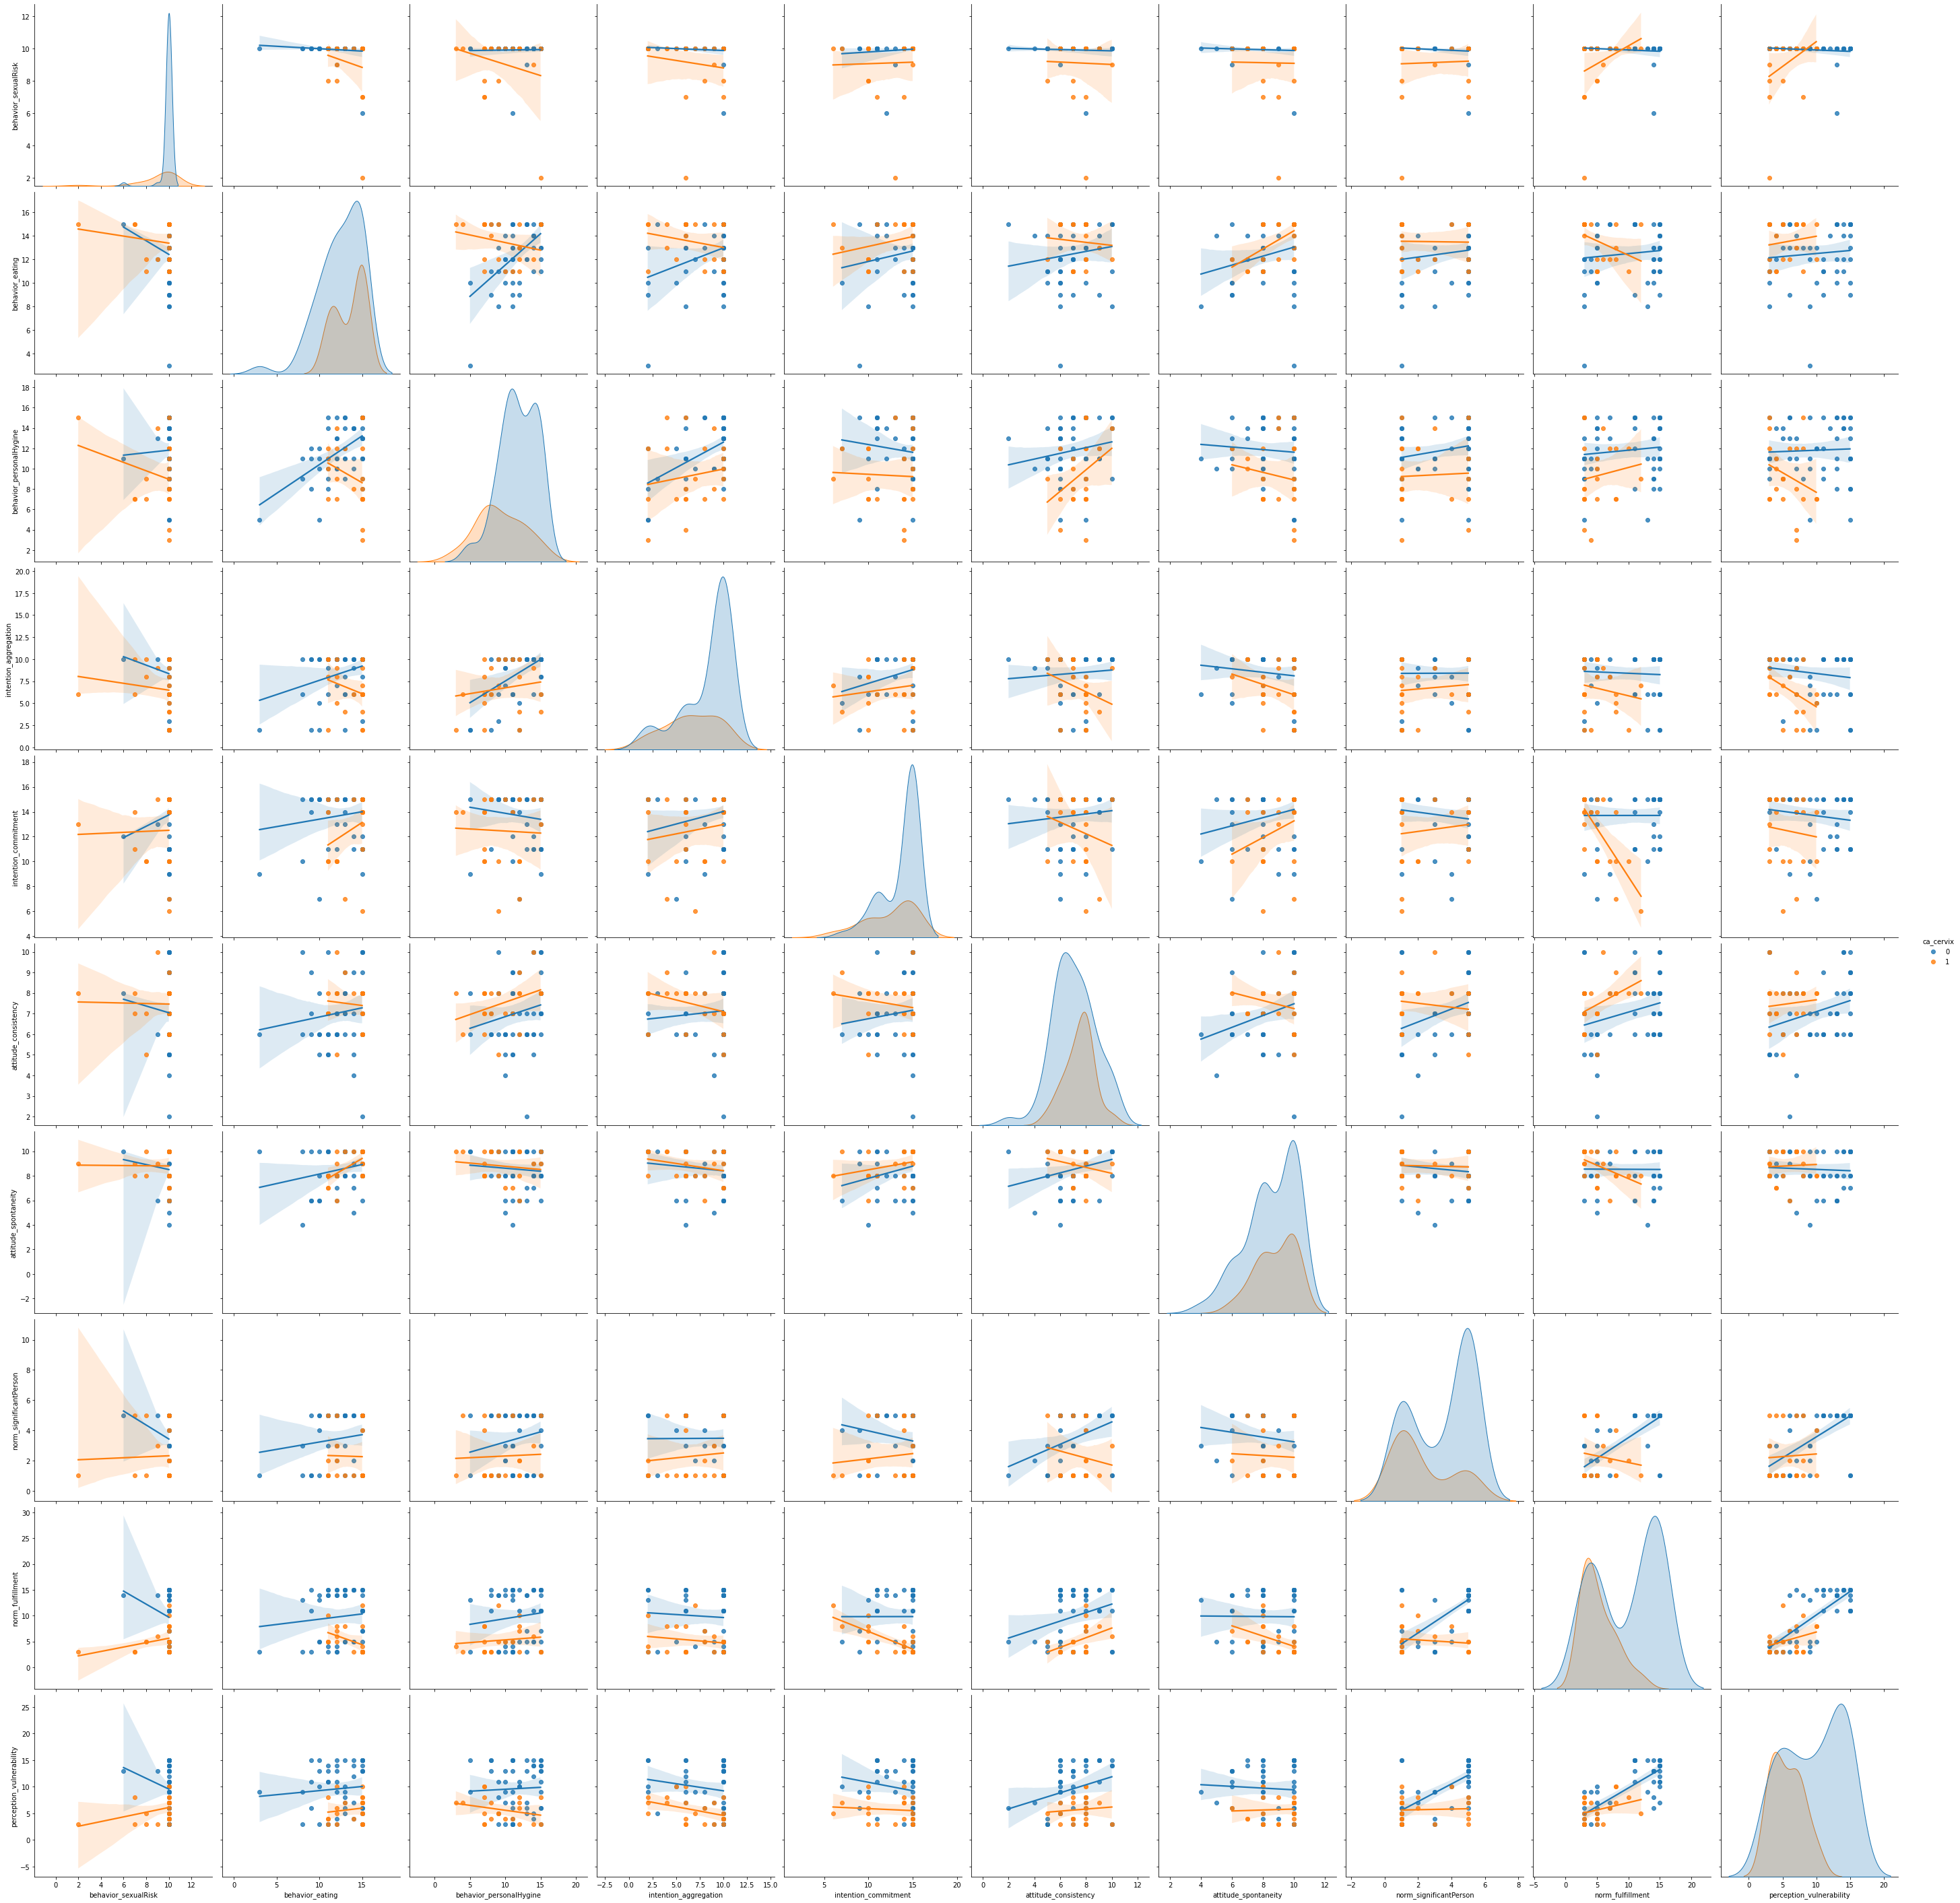

In [ ]:
sb.pairplot(df1, hue= 'ca_cervix',size=4,vars=list(df1.iloc[:,0:10].columns),kind='reg')

## Diseño de modelos


Para abordar el problema, evaluaremos nueve casos, usando tres modelos (LR, KNN Y SVM) y tres normalizaciones de datos (StandardScaler, MinMaxScaler y RobustScaler)

In [ ]:
X = np.array(df1.drop(['ca_cervix'],1))
y = np.array(df1['ca_cervix'])

<h2>Caso StandardScaler


</h2>

In [ ]:
scaler = StandardScaler()
x_data_sc1 = scaler.fit_transform(X)

<h4>Regresión Logistica</h4>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data_sc1,y,test_size = 0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(x_test, y_test)

1.0

In [ ]:
for j in range(2, 10):
  name='Logistic Regression'
  kfold = KFold(n_splits=j)
  cv_results = cross_val_score(log_reg, x_train, y_train, cv=kfold, scoring='accuracy')
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logistic Regression: 0.920000 (0.040000)
Logistic Regression: 0.881127 (0.082336)
Logistic Regression: 0.902244 (0.083503)
Logistic Regression: 0.900000 (0.109545)
Logistic Regression: 0.865741 (0.118033)
Logistic Regression: 0.882653 (0.112477)
Logistic Regression: 0.866071 (0.113525)
Logistic Regression: 0.903704 (0.117004)


La precisión del mejor modelo de Regresión Logistica es de un <b>92%</b>

<h4>K-Nearest-Neighbour</h4>

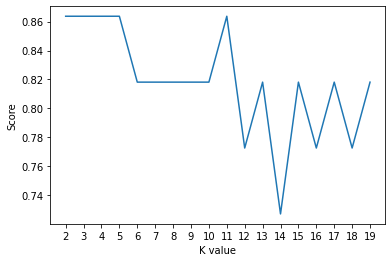

Maximo KNN Score es 86.36%


In [ ]:
score_values = []
for i in range(2,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_values.append(knn2.score(x_test, y_test))

plt.plot(range(2,20), score_values)
plt.xticks(np.arange(2,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(score_values)*100
print("Maximo KNN Score es {:.2f}%".format(acc))

La precisión del mejor modelo de KNN es de un <b>86.36%</b>

<h4>SVM</h4>

In [ ]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 95.45%


En consideración del alto valor de accuracy (95.45%), evaluaremos el SVM por medio de un cross validator

In [ ]:
for j in range(2, 10):
  name='SVM'
  kfold = KFold(n_splits=j)
  cv_results = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='accuracy')
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

SVM: 0.840000 (0.040000)
SVM: 0.860294 (0.072790)
SVM: 0.802885 (0.112807)
SVM: 0.840000 (0.101980)
SVM: 0.863426 (0.122248)
SVM: 0.818878 (0.101208)
SVM: 0.842262 (0.138289)
SVM: 0.800000 (0.106574)


La precisión del modelo de SVM es de un <b>86.34%</b>

<h2>Caso MinMaxScaler</h2>

In [ ]:
scaler = MinMaxScaler()
x_data_sc2 = scaler.fit_transform(X)

<h4>Regresión Logistica</h4>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data_sc2,y,test_size = 0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
for j in range(2, 10):
  name='Logistic Regression'
  kfold = KFold(n_splits=j)
  cv_results = cross_val_score(log_reg, x_train, y_train, cv=kfold, scoring='accuracy')
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logistic Regression: 0.900000 (0.100000)
Logistic Regression: 0.901961 (0.099981)
Logistic Regression: 0.884615 (0.115385)
Logistic Regression: 0.880000 (0.116619)
Logistic Regression: 0.886574 (0.128404)
Logistic Regression: 0.903061 (0.118780)
Logistic Regression: 0.886905 (0.120673)
Logistic Regression: 0.888889 (0.136083)


La precisión del mejor modelo de Regresión Logistica es de un <b>90.3%</b>

<h4>K-Nearest-Neighbour</h4>

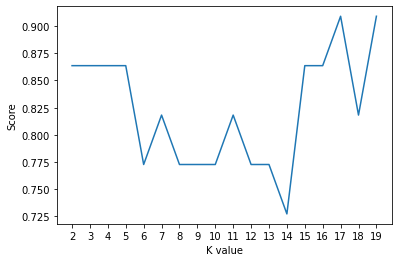

Maximo KNN Score es 90.91%


In [ ]:
score_values = []
for i in range(2,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_values.append(knn2.score(x_test, y_test))

plt.plot(range(2,20), score_values)
plt.xticks(np.arange(2,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(score_values)*100
print("Maximo KNN Score es {:.2f}%".format(acc))

La precisión del mejor modelo de KNN es de un <b>90.91%</b>

<h4>SVM</h4>

In [ ]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 95.45%


En consideración del alto valor de accuracy (95.45%), evaluaremos el SVM por medio de un cross validator

In [ ]:
for j in range(2, 10):
  name='SVM'
  kfold = KFold(n_splits=j)
  cv_results = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='accuracy')
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

SVM: 0.860000 (0.060000)
SVM: 0.861520 (0.072065)
SVM: 0.823718 (0.123678)
SVM: 0.840000 (0.080000)
SVM: 0.863426 (0.098672)
SVM: 0.880102 (0.090911)
SVM: 0.883929 (0.098484)
SVM: 0.866667 (0.106574)


La precisión del modelo de SVM es de un <b>88.39%</b>

<h2>Caso RobustScaler</h2>

In [ ]:
scaler = RobustScaler()
x_data_sc3 = scaler.fit_transform(X)

<h4>Regresión Logistica</h4>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data_sc3,y,test_size = 0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
for j in range(2, 10):
  name='Logistic Regression'
  kfold = KFold(n_splits=j)
  cv_results = cross_val_score(log_reg, x_train, y_train, cv=kfold, scoring='accuracy')
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logistic Regression: 0.860000 (0.060000)
Logistic Regression: 0.861520 (0.072065)
Logistic Regression: 0.801282 (0.067078)
Logistic Regression: 0.840000 (0.120000)
Logistic Regression: 0.844907 (0.102507)
Logistic Regression: 0.841837 (0.114313)
Logistic Regression: 0.824405 (0.144307)
Logistic Regression: 0.840741 (0.097851)


La precisión del mejor modelo de Regresión Logistica es de un <b>86.15%</b>

<h4>K-Nearest-Neighbour</h4>

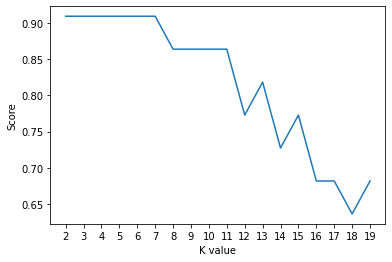

Maximo KNN Score es 90.91%


In [ ]:
score_values = []
for i in range(2,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_values.append(knn2.score(x_test, y_test))

plt.plot(range(2,20), score_values)
plt.xticks(np.arange(2,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(score_values)*100
print("Maximo KNN Score es {:.2f}%".format(acc))

La precisión del mejor modelo de Regresión Logistica es de un <b>90.91%</b>

<h4>SVM</h4>

In [ ]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 90.91%


La precisión del mejor modelo de SVM es un <b>90.91%</b>

# Conclusión

<table >
  <tr>
    <th>Modelo</th>
    <th>StandardScaler</th>
    <th>MinMaxScaler</th>
    <th>RobustScaler</th>

  </tr>
  <tr>
    <td>LR</td>
    <td>92%</td>
    <td>90.3%</td>
    <td>86.15%</td>

  </tr>
  <tr>
    <td>KNN</td>
    <td>86.36%</td>
    <td>90.91%</td>
    <td>90.91%</td>
  </tr>

   <tr>
    <td>SVM</td>
    <td>86.34%</td>
    <td>88.39%</td>
    <td>90.91%</td>
  </tr>
</table>

El modelo de regresión logistica utilizado permite alcanzar un nivel del 92% de clasificación correcta, sin embargo, debemos considerar que la data empleada es de tamaño bajo, por lo que sería correcto ampliar la data para entrenar de mejor manera los datos e ir mejorando el poder de predictibilidad. El modelo de regresión logística es una herramienta potente para el machine learning , clasificando el tipo de comportamiento que seguiran los individuos dados los datos de entrada X.
El resto de modelos obtuvieron un porcentaje alto de accuracy, pero el bajo volumen de datos nos lleva a validar estos modelos mediante cross_validation, lo que termina por derrumbar la efectividad de estos.



# Links de utilidad

- https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

- https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

- https://datacarpentry.org/python-ecology-lesson-es/08-putting-it-all-together/index.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

- https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html




Integrantes

Israel Ceballos

Daniel Contreras

Leonel Jara